In [3]:
import ssl
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

import gym
import gym_anytrading
import quantstats as qs

from stable_baselines import A2C
from stable_baselines.common.vec_env import DummyVecEnv

import warnings
warnings.filterwarnings('ignore')

In [4]:
file_path = 'https://www.cryptodatadownload.com/cdd/gemini_BTCUSD_day.csv'

ssl._create_default_https_context = ssl._create_unverified_context

bitcoin_df = pd.read_csv(file_path, skiprows=1)

In [5]:
bitcoin_df.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1624075200000,2021-06-19 04:00:00,BTCUSD,35129.23,36464.63,34970.25,35480.15,1389.165741
1,1623988800000,2021-06-18 04:00:00,BTCUSD,37938.20,38129.09,34845.33,35129.23,2958.675481
2,1623902400000,2021-06-17 04:00:00,BTCUSD,38875.00,39575.03,37221.62,37938.20,2520.913385
3,1623816000000,2021-06-16 04:00:00,BTCUSD,40043.69,40490.02,38059.01,38875.00,2783.604082
4,1623729600000,2021-06-15 04:00:00,BTCUSD,40429.38,41380.02,39503.90,40043.69,2687.612479


In [6]:
bitcoin_df['Date'] = pd.to_datetime(bitcoin_df['Date']).dt.date

In [29]:
bitcoin_df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [7]:
bitcoin_df.set_index('Date', inplace=True)

In [8]:
bitcoin_df.drop(labels=['Unix Timestamp', 'Symbol'], axis=1, inplace=True)

In [9]:
bitcoin_df.sort_index(ascending=True, inplace=True)

In [40]:
bitcoin_df.index = pd.to_datetime(bitcoin_df.index)

In [10]:
bitcoin_df.info

<bound method DataFrame.info of                 Open      High       Low     Close       Volume
Date                                                           
2015-10-08      0.00    245.00      0.00    243.60    34.754703
2015-10-09    243.60    249.97    243.60    245.51    61.587068
2015-10-10    245.51    246.30    244.60    246.30    30.870549
2015-10-11    246.30    249.50    245.96    248.98    22.747091
2015-10-12    248.98    248.98    245.75    245.75    71.047743
...              ...       ...       ...       ...          ...
2021-06-15  40429.38  41380.02  39503.90  40043.69  2687.612479
2021-06-16  40043.69  40490.02  38059.01  38875.00  2783.604082
2021-06-17  38875.00  39575.03  37221.62  37938.20  2520.913385
2021-06-18  37938.20  38129.09  34845.33  35129.23  2958.675481
2021-06-19  35129.23  36464.63  34970.25  35480.15  1389.165741

[2082 rows x 5 columns]>

In [42]:
train_start = 5
train_end = round(len(bitcoin_df) * 0.8)

In [43]:
test_start = train_end + 1
test_end = len(bitcoin_df)

In [44]:
env = gym.make('stocks-v0', df=bitcoin_df, frame_bound=(train_start, train_end), window_size=train_start)

In [45]:
len(env.signal_features)

1666

In [46]:
env.action_space

Discrete(2)

info {'total_reward': 13126.549999999997, 'total_profit': 0.030821606389096944, 'position': 0}


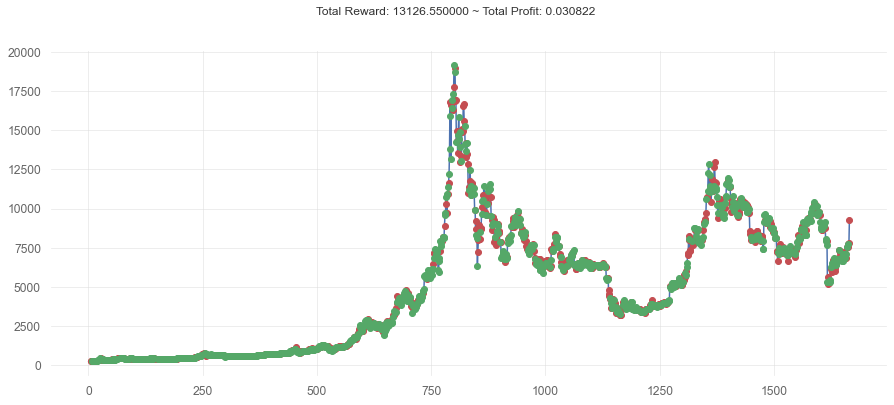

In [47]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [48]:
env_maker = lambda: gym.make('stocks-v0', df=bitcoin_df, frame_bound=(train_start, train_end), window_size=train_start)
env = DummyVecEnv([env_maker])

In [51]:
# policy_kwargs = dict(net_arch=[64, 'lstm', dict(vf=[128, 128, 128], pi=[64, 64])])
# model = A2C('MlpLstmPolicy', env, verbose=1, policy_kwargs=policy_kwargs)
model = A2C('MlpLstmPolicy', env, verbose=1)
model.learn(total_timesteps=1_000_000)

---------------------------------
| explained_variance | 0.0014   |
| fps                | 19       |
| nupdates           | 1        |
| policy_entropy     | 0.69     |
| total_timesteps    | 5        |
| value_loss         | 153      |
---------------------------------
----------------------------------
| explained_variance | -8.24e-05 |
| fps                | 563       |
| nupdates           | 100       |
| policy_entropy     | 0.688     |
| total_timesteps    | 500       |
| value_loss         | 211       |
----------------------------------
----------------------------------
| explained_variance | -0.000414 |
| fps                | 681       |
| nupdates           | 200       |
| policy_entropy     | 0.688     |
| total_timesteps    | 1000      |
| value_loss         | 1.15e+03  |
----------------------------------
---------------------------------
| explained_variance | 9.94e-05 |
| fps                | 746      |
| nupdates           | 300      |
| policy_entropy     | 0.691    

---------------------------------
| explained_variance | 0.000137 |
| fps                | 910      |
| nupdates           | 3100     |
| policy_entropy     | 0.671    |
| total_timesteps    | 15500    |
| value_loss         | 49.9     |
---------------------------------
---------------------------------
| explained_variance | 3.55e-05 |
| fps                | 913      |
| nupdates           | 3200     |
| policy_entropy     | 0.62     |
| total_timesteps    | 16000    |
| value_loss         | 4.15e+05 |
---------------------------------
---------------------------------
| explained_variance | 2.43e-05 |
| fps                | 914      |
| nupdates           | 3300     |
| policy_entropy     | 0.692    |
| total_timesteps    | 16500    |
| value_loss         | 1.24e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.00332  |
| fps                | 917      |
| nupdates           | 3400     |
| policy_entropy     | 0.678    |
| total_timest

---------------------------------
| explained_variance | 0.0372   |
| fps                | 887      |
| nupdates           | 6100     |
| policy_entropy     | 0.689    |
| total_timesteps    | 30500    |
| value_loss         | 0.0241   |
---------------------------------
---------------------------------
| explained_variance | 0.000179 |
| fps                | 888      |
| nupdates           | 6200     |
| policy_entropy     | 0.691    |
| total_timesteps    | 31000    |
| value_loss         | 581      |
---------------------------------
---------------------------------
| explained_variance | 0.000464 |
| fps                | 888      |
| nupdates           | 6300     |
| policy_entropy     | 0.69     |
| total_timesteps    | 31500    |
| value_loss         | 9.53e+05 |
---------------------------------
---------------------------------
| explained_variance | -0.00119 |
| fps                | 889      |
| nupdates           | 6400     |
| policy_entropy     | 0.689    |
| total_timest

---------------------------------
| explained_variance | 0.0178   |
| fps                | 894      |
| nupdates           | 9100     |
| policy_entropy     | 0.684    |
| total_timesteps    | 45500    |
| value_loss         | 0.0733   |
---------------------------------
----------------------------------
| explained_variance | -1.39e-05 |
| fps                | 894       |
| nupdates           | 9200      |
| policy_entropy     | 0.676     |
| total_timesteps    | 46000     |
| value_loss         | 1.57e+03  |
----------------------------------
----------------------------------
| explained_variance | -0.000252 |
| fps                | 894       |
| nupdates           | 9300      |
| policy_entropy     | 0.661     |
| total_timesteps    | 46500     |
| value_loss         | 183       |
----------------------------------
---------------------------------
| explained_variance | 0.000143 |
| fps                | 895      |
| nupdates           | 9400     |
| policy_entropy     | 0.651    

---------------------------------
| explained_variance | -0.00226 |
| fps                | 893      |
| nupdates           | 12100    |
| policy_entropy     | 0.678    |
| total_timesteps    | 60500    |
| value_loss         | 0.0286   |
---------------------------------
---------------------------------
| explained_variance | 2.54e-05 |
| fps                | 894      |
| nupdates           | 12200    |
| policy_entropy     | 0.686    |
| total_timesteps    | 61000    |
| value_loss         | 1.83e+03 |
---------------------------------
----------------------------------
| explained_variance | -0.000235 |
| fps                | 895       |
| nupdates           | 12300     |
| policy_entropy     | 0.678     |
| total_timesteps    | 61500     |
| value_loss         | 73.3      |
----------------------------------
---------------------------------
| explained_variance | 9.72e-06 |
| fps                | 895      |
| nupdates           | 12400    |
| policy_entropy     | 0.687    |
| tota

---------------------------------
| explained_variance | 2.56e-06 |
| fps                | 888      |
| nupdates           | 15100    |
| policy_entropy     | 0.656    |
| total_timesteps    | 75500    |
| value_loss         | 1.97e+06 |
---------------------------------
----------------------------------
| explained_variance | -9.18e-06 |
| fps                | 888       |
| nupdates           | 15200     |
| policy_entropy     | 0.693     |
| total_timesteps    | 76000     |
| value_loss         | 3.28e+04  |
----------------------------------
---------------------------------
| explained_variance | 0.0416   |
| fps                | 888      |
| nupdates           | 15300    |
| policy_entropy     | 0.693    |
| total_timesteps    | 76500    |
| value_loss         | 6.1      |
---------------------------------
---------------------------------
| explained_variance | 0.0162   |
| fps                | 887      |
| nupdates           | 15400    |
| policy_entropy     | 0.689    |
| tota

----------------------------------
| explained_variance | -0.000142 |
| fps                | 894       |
| nupdates           | 18100     |
| policy_entropy     | 0.66      |
| total_timesteps    | 90500     |
| value_loss         | 3.16e+05  |
----------------------------------
----------------------------------
| explained_variance | -4.53e-06 |
| fps                | 894       |
| nupdates           | 18200     |
| policy_entropy     | 0.627     |
| total_timesteps    | 91000     |
| value_loss         | 2.78e+05  |
----------------------------------
---------------------------------
| explained_variance | 0.000523 |
| fps                | 894      |
| nupdates           | 18300    |
| policy_entropy     | 0.693    |
| total_timesteps    | 91500    |
| value_loss         | 20.2     |
---------------------------------
---------------------------------
| explained_variance | 1.33e-05 |
| fps                | 894      |
| nupdates           | 18400    |
| policy_entropy     | 0.689    

----------------------------------
| explained_variance | -0.000455 |
| fps                | 899       |
| nupdates           | 21100     |
| policy_entropy     | 0.688     |
| total_timesteps    | 105500    |
| value_loss         | 64.2      |
----------------------------------
----------------------------------
| explained_variance | -0.000258 |
| fps                | 899       |
| nupdates           | 21200     |
| policy_entropy     | 0.681     |
| total_timesteps    | 106000    |
| value_loss         | 3.25e+03  |
----------------------------------
---------------------------------
| explained_variance | 0.00014  |
| fps                | 899      |
| nupdates           | 21300    |
| policy_entropy     | 0.693    |
| total_timesteps    | 106500   |
| value_loss         | 383      |
---------------------------------
---------------------------------
| explained_variance | 0.000189 |
| fps                | 899      |
| nupdates           | 21400    |
| policy_entropy     | 0.693    

---------------------------------
| explained_variance | 2.78e-05 |
| fps                | 897      |
| nupdates           | 24100    |
| policy_entropy     | 0.693    |
| total_timesteps    | 120500   |
| value_loss         | 1.24e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.169    |
| fps                | 897      |
| nupdates           | 24200    |
| policy_entropy     | 0.686    |
| total_timesteps    | 121000   |
| value_loss         | 0.0304   |
---------------------------------
----------------------------------
| explained_variance | -0.000149 |
| fps                | 897       |
| nupdates           | 24300     |
| policy_entropy     | 0.651     |
| total_timesteps    | 121500    |
| value_loss         | 24.8      |
----------------------------------
---------------------------------
| explained_variance | -0.0154  |
| fps                | 897      |
| nupdates           | 24400    |
| policy_entropy     | 0.693    |
| tota

---------------------------------
| explained_variance | 4.05e-06 |
| fps                | 898      |
| nupdates           | 27100    |
| policy_entropy     | 0.679    |
| total_timesteps    | 135500   |
| value_loss         | 8.62e+03 |
---------------------------------
----------------------------------
| explained_variance | -0.000128 |
| fps                | 898       |
| nupdates           | 27200     |
| policy_entropy     | 0.68      |
| total_timesteps    | 136000    |
| value_loss         | 171       |
----------------------------------
---------------------------------
| explained_variance | -0.00312 |
| fps                | 898      |
| nupdates           | 27300    |
| policy_entropy     | 0.68     |
| total_timesteps    | 136500   |
| value_loss         | 613      |
---------------------------------
---------------------------------
| explained_variance | -0.00152 |
| fps                | 899      |
| nupdates           | 27400    |
| policy_entropy     | 0.663    |
| tota

----------------------------------
| explained_variance | -7.83e-05 |
| fps                | 897       |
| nupdates           | 30100     |
| policy_entropy     | 0.692     |
| total_timesteps    | 150500    |
| value_loss         | 1.18e+03  |
----------------------------------
----------------------------------
| explained_variance | -5.72e-06 |
| fps                | 896       |
| nupdates           | 30200     |
| policy_entropy     | 0.69      |
| total_timesteps    | 151000    |
| value_loss         | 5.45e+04  |
----------------------------------
---------------------------------
| explained_variance | -0.015   |
| fps                | 896      |
| nupdates           | 30300    |
| policy_entropy     | 0.691    |
| total_timesteps    | 151500   |
| value_loss         | 0.0504   |
---------------------------------
----------------------------------
| explained_variance | -0.000131 |
| fps                | 896       |
| nupdates           | 30400     |
| policy_entropy     | 0.692

---------------------------------
| explained_variance | 2.44e-05 |
| fps                | 893      |
| nupdates           | 33100    |
| policy_entropy     | 0.693    |
| total_timesteps    | 165500   |
| value_loss         | 7.56e+03 |
---------------------------------
----------------------------------
| explained_variance | -1.32e-05 |
| fps                | 893       |
| nupdates           | 33200     |
| policy_entropy     | 0.692     |
| total_timesteps    | 166000    |
| value_loss         | 4.18e+04  |
----------------------------------
---------------------------------
| explained_variance | -0.00025 |
| fps                | 893      |
| nupdates           | 33300    |
| policy_entropy     | 0.657    |
| total_timesteps    | 166500   |
| value_loss         | 181      |
---------------------------------
---------------------------------
| explained_variance | 2.21e-05 |
| fps                | 893      |
| nupdates           | 33400    |
| policy_entropy     | 0.691    |
| tota

---------------------------------
| explained_variance | 0.000665 |
| fps                | 892      |
| nupdates           | 36100    |
| policy_entropy     | 0.684    |
| total_timesteps    | 180500   |
| value_loss         | 36.6     |
---------------------------------
---------------------------------
| explained_variance | 1.79e-05 |
| fps                | 892      |
| nupdates           | 36200    |
| policy_entropy     | 0.69     |
| total_timesteps    | 181000   |
| value_loss         | 2.1e+03  |
---------------------------------
---------------------------------
| explained_variance | 0.000232 |
| fps                | 892      |
| nupdates           | 36300    |
| policy_entropy     | 0.69     |
| total_timesteps    | 181500   |
| value_loss         | 34.6     |
---------------------------------
----------------------------------
| explained_variance | -8.79e-05 |
| fps                | 892       |
| nupdates           | 36400     |
| policy_entropy     | 0.676     |
| total_t

----------------------------------
| explained_variance | -0.000452 |
| fps                | 891       |
| nupdates           | 39100     |
| policy_entropy     | 0.692     |
| total_timesteps    | 195500    |
| value_loss         | 1.09e+04  |
----------------------------------
---------------------------------
| explained_variance | 0.00867  |
| fps                | 891      |
| nupdates           | 39200    |
| policy_entropy     | 0.692    |
| total_timesteps    | 196000   |
| value_loss         | 0.0466   |
---------------------------------
---------------------------------
| explained_variance | -0.00108 |
| fps                | 891      |
| nupdates           | 39300    |
| policy_entropy     | 0.69     |
| total_timesteps    | 196500   |
| value_loss         | 5.19e+03 |
---------------------------------
---------------------------------
| explained_variance | 1.4e-05  |
| fps                | 891      |
| nupdates           | 39400    |
| policy_entropy     | 0.691    |
| tota

---------------------------------
| explained_variance | 0.000279 |
| fps                | 890      |
| nupdates           | 42100    |
| policy_entropy     | 0.68     |
| total_timesteps    | 210500   |
| value_loss         | 56.3     |
---------------------------------
---------------------------------
| explained_variance | -0.00821 |
| fps                | 890      |
| nupdates           | 42200    |
| policy_entropy     | 0.69     |
| total_timesteps    | 211000   |
| value_loss         | 11.7     |
---------------------------------
----------------------------------
| explained_variance | -9.06e-06 |
| fps                | 890       |
| nupdates           | 42300     |
| policy_entropy     | 0.683     |
| total_timesteps    | 211500    |
| value_loss         | 5.57e+04  |
----------------------------------
----------------------------------
| explained_variance | -3.54e-05 |
| fps                | 890       |
| nupdates           | 42400     |
| policy_entropy     | 0.691     |
|

---------------------------------
| explained_variance | -0.00563 |
| fps                | 889      |
| nupdates           | 45100    |
| policy_entropy     | 0.688    |
| total_timesteps    | 225500   |
| value_loss         | 0.0492   |
---------------------------------
---------------------------------
| explained_variance | 0.0132   |
| fps                | 889      |
| nupdates           | 45200    |
| policy_entropy     | 0.691    |
| total_timesteps    | 226000   |
| value_loss         | 88.9     |
---------------------------------
---------------------------------
| explained_variance | 0.000133 |
| fps                | 890      |
| nupdates           | 45300    |
| policy_entropy     | 0.687    |
| total_timesteps    | 226500   |
| value_loss         | 8.36e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.00429  |
| fps                | 890      |
| nupdates           | 45400    |
| policy_entropy     | 0.686    |
| total_timest

---------------------------------
| explained_variance | 1.86e-05 |
| fps                | 883      |
| nupdates           | 48100    |
| policy_entropy     | 0.693    |
| total_timesteps    | 240500   |
| value_loss         | 3.65e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.000179 |
| fps                | 883      |
| nupdates           | 48200    |
| policy_entropy     | 0.646    |
| total_timesteps    | 241000   |
| value_loss         | 10.4     |
---------------------------------
----------------------------------
| explained_variance | -2.38e-07 |
| fps                | 883       |
| nupdates           | 48300     |
| policy_entropy     | 0.693     |
| total_timesteps    | 241500    |
| value_loss         | 6.28e+06  |
----------------------------------
---------------------------------
| explained_variance | 0.000306 |
| fps                | 883      |
| nupdates           | 48400    |
| policy_entropy     | 0.692    |
| tota

---------------------------------
| explained_variance | -3.1e-06 |
| fps                | 885      |
| nupdates           | 51100    |
| policy_entropy     | 0.682    |
| total_timesteps    | 255500   |
| value_loss         | 1.18e+04 |
---------------------------------
---------------------------------
| explained_variance | 0.000318 |
| fps                | 885      |
| nupdates           | 51200    |
| policy_entropy     | 0.685    |
| total_timesteps    | 256000   |
| value_loss         | 0.995    |
---------------------------------
----------------------------------
| explained_variance | -7.15e-07 |
| fps                | 885       |
| nupdates           | 51300     |
| policy_entropy     | 0.663     |
| total_timesteps    | 256500    |
| value_loss         | 5.89e+05  |
----------------------------------
---------------------------------
| explained_variance | -3.7e-06 |
| fps                | 886      |
| nupdates           | 51400    |
| policy_entropy     | 0.685    |
| tota

----------------------------------
| explained_variance | -5.88e-05 |
| fps                | 889       |
| nupdates           | 54100     |
| policy_entropy     | 0.688     |
| total_timesteps    | 270500    |
| value_loss         | 7.04e+03  |
----------------------------------
---------------------------------
| explained_variance | -0.00115 |
| fps                | 889      |
| nupdates           | 54200    |
| policy_entropy     | 0.661    |
| total_timesteps    | 271000   |
| value_loss         | 79.8     |
---------------------------------
---------------------------------
| explained_variance | 1.93e-05 |
| fps                | 889      |
| nupdates           | 54300    |
| policy_entropy     | 0.686    |
| total_timesteps    | 271500   |
| value_loss         | 1.26e+05 |
---------------------------------
---------------------------------
| explained_variance | 0.0376   |
| fps                | 889      |
| nupdates           | 54400    |
| policy_entropy     | 0.693    |
| tota

---------------------------------
| explained_variance | 4.53e-06 |
| fps                | 888      |
| nupdates           | 57100    |
| policy_entropy     | 0.673    |
| total_timesteps    | 285500   |
| value_loss         | 9.14e+04 |
---------------------------------
---------------------------------
| explained_variance | 2.69e-05 |
| fps                | 888      |
| nupdates           | 57200    |
| policy_entropy     | 0.691    |
| total_timesteps    | 286000   |
| value_loss         | 1.24e+03 |
---------------------------------
----------------------------------
| explained_variance | -0.000119 |
| fps                | 888       |
| nupdates           | 57300     |
| policy_entropy     | 0.692     |
| total_timesteps    | 286500    |
| value_loss         | 3.56e+04  |
----------------------------------
---------------------------------
| explained_variance | 0.00124  |
| fps                | 888      |
| nupdates           | 57400    |
| policy_entropy     | 0.691    |
| tota

---------------------------------
| explained_variance | -0.00233 |
| fps                | 890      |
| nupdates           | 60100    |
| policy_entropy     | 0.691    |
| total_timesteps    | 300500   |
| value_loss         | 5.09     |
---------------------------------
----------------------------------
| explained_variance | -6.08e-06 |
| fps                | 890       |
| nupdates           | 60200     |
| policy_entropy     | 0.691     |
| total_timesteps    | 301000    |
| value_loss         | 1.41e+03  |
----------------------------------
----------------------------------
| explained_variance | -2.38e-06 |
| fps                | 891       |
| nupdates           | 60300     |
| policy_entropy     | 0.683     |
| total_timesteps    | 301500    |
| value_loss         | 1.1e+04   |
----------------------------------
----------------------------------
| explained_variance | -2.62e-06 |
| fps                | 891       |
| nupdates           | 60400     |
| policy_entropy     | 0.692

---------------------------------
| explained_variance | 0        |
| fps                | 891      |
| nupdates           | 63100    |
| policy_entropy     | 0.678    |
| total_timesteps    | 315500   |
| value_loss         | 1.16e+03 |
---------------------------------
----------------------------------
| explained_variance | -2.26e-06 |
| fps                | 891       |
| nupdates           | 63200     |
| policy_entropy     | 0.692     |
| total_timesteps    | 316000    |
| value_loss         | 7.59e+03  |
----------------------------------
---------------------------------
| explained_variance | 1.26e-05 |
| fps                | 891      |
| nupdates           | 63300    |
| policy_entropy     | 0.693    |
| total_timesteps    | 316500   |
| value_loss         | 5.63e+04 |
---------------------------------
---------------------------------
| explained_variance | 0        |
| fps                | 891      |
| nupdates           | 63400    |
| policy_entropy     | 0.69     |
| tota

----------------------------------
| explained_variance | -5.75e-05 |
| fps                | 893       |
| nupdates           | 66100     |
| policy_entropy     | 0.638     |
| total_timesteps    | 330500    |
| value_loss         | 43.6      |
----------------------------------
---------------------------------
| explained_variance | 6.56e-07 |
| fps                | 893      |
| nupdates           | 66200    |
| policy_entropy     | 0.668    |
| total_timesteps    | 331000   |
| value_loss         | 2e+04    |
---------------------------------
---------------------------------
| explained_variance | 8.34e-07 |
| fps                | 892      |
| nupdates           | 66300    |
| policy_entropy     | 0.693    |
| total_timesteps    | 331500   |
| value_loss         | 6.47e+03 |
---------------------------------
---------------------------------
| explained_variance | 4.17e-07 |
| fps                | 892      |
| nupdates           | 66400    |
| policy_entropy     | 0.687    |
| tota

----------------------------------
| explained_variance | -0.000745 |
| fps                | 892       |
| nupdates           | 69100     |
| policy_entropy     | 0.579     |
| total_timesteps    | 345500    |
| value_loss         | 0.0766    |
----------------------------------
----------------------------------
| explained_variance | -0.000782 |
| fps                | 892       |
| nupdates           | 69200     |
| policy_entropy     | 0.683     |
| total_timesteps    | 346000    |
| value_loss         | 0.0715    |
----------------------------------
----------------------------------
| explained_variance | -3.58e-07 |
| fps                | 893       |
| nupdates           | 69300     |
| policy_entropy     | 0.681     |
| total_timesteps    | 346500    |
| value_loss         | 7.49e+03  |
----------------------------------
----------------------------------
| explained_variance | -1.55e-06 |
| fps                | 893       |
| nupdates           | 69400     |
| policy_entropy    

---------------------------------
| explained_variance | 3.61e-05 |
| fps                | 894      |
| nupdates           | 72100    |
| policy_entropy     | 0.684    |
| total_timesteps    | 360500   |
| value_loss         | 64       |
---------------------------------
---------------------------------
| explained_variance | 2.38e-07 |
| fps                | 894      |
| nupdates           | 72200    |
| policy_entropy     | 0.691    |
| total_timesteps    | 361000   |
| value_loss         | 2.03e+06 |
---------------------------------
---------------------------------
| explained_variance | 1.36e-05 |
| fps                | 894      |
| nupdates           | 72300    |
| policy_entropy     | 0.682    |
| total_timesteps    | 361500   |
| value_loss         | 6.98e+03 |
---------------------------------
---------------------------------
| explained_variance | -0.00117 |
| fps                | 893      |
| nupdates           | 72400    |
| policy_entropy     | 0.688    |
| total_timest

----------------------------------
| explained_variance | -3.61e-05 |
| fps                | 892       |
| nupdates           | 75100     |
| policy_entropy     | 0.686     |
| total_timesteps    | 375500    |
| value_loss         | 2.73      |
----------------------------------
---------------------------------
| explained_variance | 0        |
| fps                | 892      |
| nupdates           | 75200    |
| policy_entropy     | 0.693    |
| total_timesteps    | 376000   |
| value_loss         | 1.62e+05 |
---------------------------------
---------------------------------
| explained_variance | 0.000512 |
| fps                | 892      |
| nupdates           | 75300    |
| policy_entropy     | 0.679    |
| total_timesteps    | 376500   |
| value_loss         | 0.0785   |
---------------------------------
----------------------------------
| explained_variance | -0.000278 |
| fps                | 892       |
| nupdates           | 75400     |
| policy_entropy     | 0.689     |
|

---------------------------------
| explained_variance | 0.000145 |
| fps                | 892      |
| nupdates           | 78100    |
| policy_entropy     | 0.685    |
| total_timesteps    | 390500   |
| value_loss         | 1.04     |
---------------------------------
----------------------------------
| explained_variance | -0.000175 |
| fps                | 892       |
| nupdates           | 78200     |
| policy_entropy     | 0.679     |
| total_timesteps    | 391000    |
| value_loss         | 0.0843    |
----------------------------------
---------------------------------
| explained_variance | 1.43e-06 |
| fps                | 892      |
| nupdates           | 78300    |
| policy_entropy     | 0.693    |
| total_timesteps    | 391500   |
| value_loss         | 5.33e+05 |
---------------------------------
----------------------------------
| explained_variance | -0.000864 |
| fps                | 892       |
| nupdates           | 78400     |
| policy_entropy     | 0.646     |
|

---------------------------------
| explained_variance | -0.0321  |
| fps                | 893      |
| nupdates           | 81100    |
| policy_entropy     | 0.674    |
| total_timesteps    | 405500   |
| value_loss         | 0.0939   |
---------------------------------
---------------------------------
| explained_variance | 1.79e-07 |
| fps                | 893      |
| nupdates           | 81200    |
| policy_entropy     | 0.69     |
| total_timesteps    | 406000   |
| value_loss         | 1.1e+05  |
---------------------------------
---------------------------------
| explained_variance | 1.07e-06 |
| fps                | 893      |
| nupdates           | 81300    |
| policy_entropy     | 0.693    |
| total_timesteps    | 406500   |
| value_loss         | 6.8e+04  |
---------------------------------
----------------------------------
| explained_variance | -4.53e-06 |
| fps                | 893       |
| nupdates           | 81400     |
| policy_entropy     | 0.69      |
| total_t

---------------------------------
| explained_variance | 0.000601 |
| fps                | 893      |
| nupdates           | 84100    |
| policy_entropy     | 0.685    |
| total_timesteps    | 420500   |
| value_loss         | 0.0877   |
---------------------------------
----------------------------------
| explained_variance | -1.19e-07 |
| fps                | 893       |
| nupdates           | 84200     |
| policy_entropy     | 0.673     |
| total_timesteps    | 421000    |
| value_loss         | 7e+04     |
----------------------------------
----------------------------------
| explained_variance | -2.38e-07 |
| fps                | 893       |
| nupdates           | 84300     |
| policy_entropy     | 0.693     |
| total_timesteps    | 421500    |
| value_loss         | 1.95e+04  |
----------------------------------
---------------------------------
| explained_variance | 7.87e-06 |
| fps                | 893      |
| nupdates           | 84400    |
| policy_entropy     | 0.691    

----------------------------------
| explained_variance | -9.66e-06 |
| fps                | 893       |
| nupdates           | 87100     |
| policy_entropy     | 0.693     |
| total_timesteps    | 435500    |
| value_loss         | 8.21e+03  |
----------------------------------
---------------------------------
| explained_variance | 0.00527  |
| fps                | 893      |
| nupdates           | 87200    |
| policy_entropy     | 0.663    |
| total_timesteps    | 436000   |
| value_loss         | 0.133    |
---------------------------------
---------------------------------
| explained_variance | 0.00428  |
| fps                | 893      |
| nupdates           | 87300    |
| policy_entropy     | 0.68     |
| total_timesteps    | 436500   |
| value_loss         | 0.129    |
---------------------------------
---------------------------------
| explained_variance | 0.000185 |
| fps                | 892      |
| nupdates           | 87400    |
| policy_entropy     | 0.687    |
| tota

----------------------------------
| explained_variance | -1.98e-05 |
| fps                | 893       |
| nupdates           | 90100     |
| policy_entropy     | 0.68      |
| total_timesteps    | 450500    |
| value_loss         | 1.27e+04  |
----------------------------------
----------------------------------
| explained_variance | -7.61e-05 |
| fps                | 893       |
| nupdates           | 90200     |
| policy_entropy     | 0.693     |
| total_timesteps    | 451000    |
| value_loss         | 2.59e+03  |
----------------------------------
---------------------------------
| explained_variance | 4.29e-06 |
| fps                | 893      |
| nupdates           | 90300    |
| policy_entropy     | 0.687    |
| total_timesteps    | 451500   |
| value_loss         | 9.8e+04  |
---------------------------------
---------------------------------
| explained_variance | 5.27e-05 |
| fps                | 893      |
| nupdates           | 90400    |
| policy_entropy     | 0.693    

----------------------------------
| explained_variance | -1.31e-06 |
| fps                | 893       |
| nupdates           | 93100     |
| policy_entropy     | 0.688     |
| total_timesteps    | 465500    |
| value_loss         | 1.39e+05  |
----------------------------------
---------------------------------
| explained_variance | 0.000375 |
| fps                | 893      |
| nupdates           | 93200    |
| policy_entropy     | 0.687    |
| total_timesteps    | 466000   |
| value_loss         | 0.0305   |
---------------------------------
----------------------------------
| explained_variance | -2.31e-05 |
| fps                | 893       |
| nupdates           | 93300     |
| policy_entropy     | 0.691     |
| total_timesteps    | 466500    |
| value_loss         | 18.4      |
----------------------------------
----------------------------------
| explained_variance | -5.36e-06 |
| fps                | 893       |
| nupdates           | 93400     |
| policy_entropy     | 0.693

---------------------------------
| explained_variance | 3.16e-06 |
| fps                | 894      |
| nupdates           | 96100    |
| policy_entropy     | 0.685    |
| total_timesteps    | 480500   |
| value_loss         | 5.17e+05 |
---------------------------------
---------------------------------
| explained_variance | -0.00343 |
| fps                | 894      |
| nupdates           | 96200    |
| policy_entropy     | 0.691    |
| total_timesteps    | 481000   |
| value_loss         | 1.43     |
---------------------------------
---------------------------------
| explained_variance | 1.96e-05 |
| fps                | 894      |
| nupdates           | 96300    |
| policy_entropy     | 0.692    |
| total_timesteps    | 481500   |
| value_loss         | 1.06e+03 |
---------------------------------
---------------------------------
| explained_variance | 2.74e-06 |
| fps                | 894      |
| nupdates           | 96400    |
| policy_entropy     | 0.693    |
| total_timest

----------------------------------
| explained_variance | -8.34e-07 |
| fps                | 894       |
| nupdates           | 99100     |
| policy_entropy     | 0.692     |
| total_timesteps    | 495500    |
| value_loss         | 6.06e+05  |
----------------------------------
---------------------------------
| explained_variance | 0.00755  |
| fps                | 894      |
| nupdates           | 99200    |
| policy_entropy     | 0.692    |
| total_timesteps    | 496000   |
| value_loss         | 0.0661   |
---------------------------------
---------------------------------
| explained_variance | 0.00017  |
| fps                | 894      |
| nupdates           | 99300    |
| policy_entropy     | 0.686    |
| total_timesteps    | 496500   |
| value_loss         | 20       |
---------------------------------
----------------------------------
| explained_variance | -4.17e-06 |
| fps                | 894       |
| nupdates           | 99400     |
| policy_entropy     | 0.693     |
|

----------------------------------
| explained_variance | -1.19e-07 |
| fps                | 895       |
| nupdates           | 102100    |
| policy_entropy     | 0.685     |
| total_timesteps    | 510500    |
| value_loss         | 5.75e+04  |
----------------------------------
---------------------------------
| explained_variance | 1.55e-06 |
| fps                | 895      |
| nupdates           | 102200   |
| policy_entropy     | 0.693    |
| total_timesteps    | 511000   |
| value_loss         | 3.4e+03  |
---------------------------------
---------------------------------
| explained_variance | 8.7e-06  |
| fps                | 895      |
| nupdates           | 102300   |
| policy_entropy     | 0.692    |
| total_timesteps    | 511500   |
| value_loss         | 9.12     |
---------------------------------
---------------------------------
| explained_variance | 6.56e-07 |
| fps                | 895      |
| nupdates           | 102400   |
| policy_entropy     | 0.693    |
| tota

---------------------------------
| explained_variance | 1.19e-07 |
| fps                | 895      |
| nupdates           | 105100   |
| policy_entropy     | 0.692    |
| total_timesteps    | 525500   |
| value_loss         | 5.83e+04 |
---------------------------------
---------------------------------
| explained_variance | 3.78e-05 |
| fps                | 895      |
| nupdates           | 105200   |
| policy_entropy     | 0.69     |
| total_timesteps    | 526000   |
| value_loss         | 2.34e+04 |
---------------------------------
----------------------------------
| explained_variance | -7.15e-06 |
| fps                | 895       |
| nupdates           | 105300    |
| policy_entropy     | 0.693     |
| total_timesteps    | 526500    |
| value_loss         | 52.7      |
----------------------------------
---------------------------------
| explained_variance | 1.19e-07 |
| fps                | 895      |
| nupdates           | 105400   |
| policy_entropy     | 0.689    |
| tota

----------------------------------
| explained_variance | -2.38e-07 |
| fps                | 896       |
| nupdates           | 108100    |
| policy_entropy     | 0.69      |
| total_timesteps    | 540500    |
| value_loss         | 5.85e+03  |
----------------------------------
---------------------------------
| explained_variance | 3.04e-06 |
| fps                | 896      |
| nupdates           | 108200   |
| policy_entropy     | 0.672    |
| total_timesteps    | 541000   |
| value_loss         | 758      |
---------------------------------
---------------------------------
| explained_variance | -3.7e-06 |
| fps                | 896      |
| nupdates           | 108300   |
| policy_entropy     | 0.686    |
| total_timesteps    | 541500   |
| value_loss         | 3.93     |
---------------------------------
---------------------------------
| explained_variance | 7.15e-05 |
| fps                | 896      |
| nupdates           | 108400   |
| policy_entropy     | 0.689    |
| tota

---------------------------------
| explained_variance | 0        |
| fps                | 896      |
| nupdates           | 111100   |
| policy_entropy     | 0.689    |
| total_timesteps    | 555500   |
| value_loss         | 4.1e+05  |
---------------------------------
----------------------------------
| explained_variance | -1.19e-07 |
| fps                | 896       |
| nupdates           | 111200    |
| policy_entropy     | 0.688     |
| total_timesteps    | 556000    |
| value_loss         | 2.63e+05  |
----------------------------------
---------------------------------
| explained_variance | 4.95e-06 |
| fps                | 896      |
| nupdates           | 111300   |
| policy_entropy     | 0.668    |
| total_timesteps    | 556500   |
| value_loss         | 36.1     |
---------------------------------
---------------------------------
| explained_variance | 3.58e-07 |
| fps                | 896      |
| nupdates           | 111400   |
| policy_entropy     | 0.68     |
| tota

----------------------------------
| explained_variance | -3.58e-07 |
| fps                | 896       |
| nupdates           | 114100    |
| policy_entropy     | 0.69      |
| total_timesteps    | 570500    |
| value_loss         | 7.59e+03  |
----------------------------------
---------------------------------
| explained_variance | 2.69e-05 |
| fps                | 896      |
| nupdates           | 114200   |
| policy_entropy     | 0.691    |
| total_timesteps    | 571000   |
| value_loss         | 6.11e+05 |
---------------------------------
----------------------------------
| explained_variance | -2.69e-05 |
| fps                | 896       |
| nupdates           | 114300    |
| policy_entropy     | 0.692     |
| total_timesteps    | 571500    |
| value_loss         | 2.9e+03   |
----------------------------------
----------------------------------
| explained_variance | -4.77e-07 |
| fps                | 896       |
| nupdates           | 114400    |
| policy_entropy     | 0.69 

---------------------------------
| explained_variance | 1.19e-07 |
| fps                | 896      |
| nupdates           | 117100   |
| policy_entropy     | 0.692    |
| total_timesteps    | 585500   |
| value_loss         | 729      |
---------------------------------
---------------------------------
| explained_variance | 5.17e-05 |
| fps                | 896      |
| nupdates           | 117200   |
| policy_entropy     | 0.673    |
| total_timesteps    | 586000   |
| value_loss         | 1.93e+03 |
---------------------------------
---------------------------------
| explained_variance | 1.31e-06 |
| fps                | 896      |
| nupdates           | 117300   |
| policy_entropy     | 0.689    |
| total_timesteps    | 586500   |
| value_loss         | 481      |
---------------------------------
----------------------------------
| explained_variance | -2.38e-07 |
| fps                | 896       |
| nupdates           | 117400    |
| policy_entropy     | 0.685     |
| total_t

----------------------------------
| explained_variance | -1.67e-06 |
| fps                | 896       |
| nupdates           | 120100    |
| policy_entropy     | 0.69      |
| total_timesteps    | 600500    |
| value_loss         | 4.65e+03  |
----------------------------------
----------------------------------
| explained_variance | -2.38e-07 |
| fps                | 896       |
| nupdates           | 120200    |
| policy_entropy     | 0.685     |
| total_timesteps    | 601000    |
| value_loss         | 10.4      |
----------------------------------
---------------------------------
| explained_variance | 4.77e-07 |
| fps                | 896      |
| nupdates           | 120300   |
| policy_entropy     | 0.691    |
| total_timesteps    | 601500   |
| value_loss         | 8.19e+03 |
---------------------------------
---------------------------------
| explained_variance | 6.56e-07 |
| fps                | 896      |
| nupdates           | 120400   |
| policy_entropy     | 0.69     

----------------------------------
| explained_variance | -1.07e-06 |
| fps                | 897       |
| nupdates           | 123100    |
| policy_entropy     | 0.691     |
| total_timesteps    | 615500    |
| value_loss         | 2.01e+05  |
----------------------------------
---------------------------------
| explained_variance | -0.00651 |
| fps                | 897      |
| nupdates           | 123200   |
| policy_entropy     | 0.67     |
| total_timesteps    | 616000   |
| value_loss         | 0.0357   |
---------------------------------
---------------------------------
| explained_variance | 5.44e-05 |
| fps                | 897      |
| nupdates           | 123300   |
| policy_entropy     | 0.692    |
| total_timesteps    | 616500   |
| value_loss         | 9.12     |
---------------------------------
----------------------------------
| explained_variance | -4.77e-07 |
| fps                | 897       |
| nupdates           | 123400    |
| policy_entropy     | 0.685     |
|

----------------------------------
| explained_variance | -5.25e-06 |
| fps                | 897       |
| nupdates           | 126100    |
| policy_entropy     | 0.692     |
| total_timesteps    | 630500    |
| value_loss         | 1.55e+05  |
----------------------------------
---------------------------------
| explained_variance | 0.000156 |
| fps                | 897      |
| nupdates           | 126200   |
| policy_entropy     | 0.691    |
| total_timesteps    | 631000   |
| value_loss         | 37.4     |
---------------------------------
---------------------------------
| explained_variance | -0.00226 |
| fps                | 897      |
| nupdates           | 126300   |
| policy_entropy     | 0.692    |
| total_timesteps    | 631500   |
| value_loss         | 0.0273   |
---------------------------------
---------------------------------
| explained_variance | 5.66e-06 |
| fps                | 897      |
| nupdates           | 126400   |
| policy_entropy     | 0.685    |
| tota

----------------------------------
| explained_variance | -4.77e-07 |
| fps                | 897       |
| nupdates           | 129100    |
| policy_entropy     | 0.683     |
| total_timesteps    | 645500    |
| value_loss         | 1.22e+05  |
----------------------------------
----------------------------------
| explained_variance | -4.54e-05 |
| fps                | 897       |
| nupdates           | 129200    |
| policy_entropy     | 0.692     |
| total_timesteps    | 646000    |
| value_loss         | 39.1      |
----------------------------------
---------------------------------
| explained_variance | 6.56e-07 |
| fps                | 897      |
| nupdates           | 129300   |
| policy_entropy     | 0.693    |
| total_timesteps    | 646500   |
| value_loss         | 3.52e+05 |
---------------------------------
---------------------------------
| explained_variance | 0.000904 |
| fps                | 897      |
| nupdates           | 129400   |
| policy_entropy     | 0.691    

---------------------------------
| explained_variance | 0.000252 |
| fps                | 898      |
| nupdates           | 132100   |
| policy_entropy     | 0.691    |
| total_timesteps    | 660500   |
| value_loss         | 1.2e+04  |
---------------------------------
---------------------------------
| explained_variance | 1.71e-05 |
| fps                | 898      |
| nupdates           | 132200   |
| policy_entropy     | 0.693    |
| total_timesteps    | 661000   |
| value_loss         | 60.9     |
---------------------------------
---------------------------------
| explained_variance | 2.98e-07 |
| fps                | 898      |
| nupdates           | 132300   |
| policy_entropy     | 0.691    |
| total_timesteps    | 661500   |
| value_loss         | 6.47e+05 |
---------------------------------
----------------------------------
| explained_variance | -1.78e-05 |
| fps                | 898       |
| nupdates           | 132400    |
| policy_entropy     | 0.692     |
| total_t

---------------------------------
| explained_variance | 4.17e-07 |
| fps                | 898      |
| nupdates           | 135100   |
| policy_entropy     | 0.686    |
| total_timesteps    | 675500   |
| value_loss         | 7.25e+03 |
---------------------------------
----------------------------------
| explained_variance | -0.000393 |
| fps                | 898       |
| nupdates           | 135200    |
| policy_entropy     | 0.686     |
| total_timesteps    | 676000    |
| value_loss         | 0.0696    |
----------------------------------
----------------------------------
| explained_variance | -3.58e-07 |
| fps                | 898       |
| nupdates           | 135300    |
| policy_entropy     | 0.693     |
| total_timesteps    | 676500    |
| value_loss         | 2.81e+05  |
----------------------------------
---------------------------------
| explained_variance | 0.00151  |
| fps                | 898      |
| nupdates           | 135400   |
| policy_entropy     | 0.678    

---------------------------------
| explained_variance | 0.000247 |
| fps                | 898      |
| nupdates           | 138100   |
| policy_entropy     | 0.637    |
| total_timesteps    | 690500   |
| value_loss         | 0.0508   |
---------------------------------
----------------------------------
| explained_variance | -1.67e-06 |
| fps                | 898       |
| nupdates           | 138200    |
| policy_entropy     | 0.684     |
| total_timesteps    | 691000    |
| value_loss         | 988       |
----------------------------------
---------------------------------
| explained_variance | 1.19e-07 |
| fps                | 898      |
| nupdates           | 138300   |
| policy_entropy     | 0.672    |
| total_timesteps    | 691500   |
| value_loss         | 4.6e+04  |
---------------------------------
---------------------------------
| explained_variance | 0        |
| fps                | 898      |
| nupdates           | 138400   |
| policy_entropy     | 0.689    |
| tota

----------------------------------
| explained_variance | -5.13e-06 |
| fps                | 896       |
| nupdates           | 141100    |
| policy_entropy     | 0.691     |
| total_timesteps    | 705500    |
| value_loss         | 2.1e+06   |
----------------------------------
---------------------------------
| explained_variance | 5.6e-05  |
| fps                | 896      |
| nupdates           | 141200   |
| policy_entropy     | 0.689    |
| total_timesteps    | 706000   |
| value_loss         | 169      |
---------------------------------
----------------------------------
| explained_variance | -2.26e-06 |
| fps                | 896       |
| nupdates           | 141300    |
| policy_entropy     | 0.693     |
| total_timesteps    | 706500    |
| value_loss         | 2.27e+04  |
----------------------------------
---------------------------------
| explained_variance | 2.87e-05 |
| fps                | 896      |
| nupdates           | 141400   |
| policy_entropy     | 0.66     

----------------------------------
| explained_variance | -7.15e-07 |
| fps                | 894       |
| nupdates           | 144100    |
| policy_entropy     | 0.693     |
| total_timesteps    | 720500    |
| value_loss         | 384       |
----------------------------------
----------------------------------
| explained_variance | -8.34e-06 |
| fps                | 894       |
| nupdates           | 144200    |
| policy_entropy     | 0.686     |
| total_timesteps    | 721000    |
| value_loss         | 373       |
----------------------------------
---------------------------------
| explained_variance | -0.00011 |
| fps                | 894      |
| nupdates           | 144300   |
| policy_entropy     | 0.692    |
| total_timesteps    | 721500   |
| value_loss         | 0.0466   |
---------------------------------
----------------------------------
| explained_variance | -1.19e-07 |
| fps                | 894       |
| nupdates           | 144400    |
| policy_entropy     | 0.655

----------------------------------
| explained_variance | -0.000174 |
| fps                | 892       |
| nupdates           | 147100    |
| policy_entropy     | 0.692     |
| total_timesteps    | 735500    |
| value_loss         | 37.1      |
----------------------------------
----------------------------------
| explained_variance | -1.19e-07 |
| fps                | 892       |
| nupdates           | 147200    |
| policy_entropy     | 0.678     |
| total_timesteps    | 736000    |
| value_loss         | 2.19e+04  |
----------------------------------
---------------------------------
| explained_variance | 7.75e-07 |
| fps                | 892      |
| nupdates           | 147300   |
| policy_entropy     | 0.693    |
| total_timesteps    | 736500   |
| value_loss         | 383      |
---------------------------------
---------------------------------
| explained_variance | 8.82e-05 |
| fps                | 892      |
| nupdates           | 147400   |
| policy_entropy     | 0.693    

---------------------------------
| explained_variance | 0.000143 |
| fps                | 892      |
| nupdates           | 150100   |
| policy_entropy     | 0.678    |
| total_timesteps    | 750500   |
| value_loss         | 11.5     |
---------------------------------
---------------------------------
| explained_variance | 0        |
| fps                | 892      |
| nupdates           | 150200   |
| policy_entropy     | 0.692    |
| total_timesteps    | 751000   |
| value_loss         | 3.71e+04 |
---------------------------------
----------------------------------
| explained_variance | -1.19e-06 |
| fps                | 892       |
| nupdates           | 150300    |
| policy_entropy     | 0.674     |
| total_timesteps    | 751500    |
| value_loss         | 0.0688    |
----------------------------------
---------------------------------
| explained_variance | 4.95e-06 |
| fps                | 892      |
| nupdates           | 150400   |
| policy_entropy     | 0.687    |
| tota

----------------------------------
| explained_variance | -2.86e-06 |
| fps                | 890       |
| nupdates           | 153100    |
| policy_entropy     | 0.693     |
| total_timesteps    | 765500    |
| value_loss         | 11.6      |
----------------------------------
----------------------------------
| explained_variance | -1.19e-07 |
| fps                | 890       |
| nupdates           | 153200    |
| policy_entropy     | 0.683     |
| total_timesteps    | 766000    |
| value_loss         | 8.06e+04  |
----------------------------------
---------------------------------
| explained_variance | 4.1e-05  |
| fps                | 890      |
| nupdates           | 153300   |
| policy_entropy     | 0.69     |
| total_timesteps    | 766500   |
| value_loss         | 2.74     |
---------------------------------
---------------------------------
| explained_variance | 0.000224 |
| fps                | 890      |
| nupdates           | 153400   |
| policy_entropy     | 0.683    

---------------------------------
| explained_variance | 0        |
| fps                | 890      |
| nupdates           | 156100   |
| policy_entropy     | 0.667    |
| total_timesteps    | 780500   |
| value_loss         | 354      |
---------------------------------
---------------------------------
| explained_variance | 0.000765 |
| fps                | 890      |
| nupdates           | 156200   |
| policy_entropy     | 0.693    |
| total_timesteps    | 781000   |
| value_loss         | 0.0456   |
---------------------------------
---------------------------------
| explained_variance | 0        |
| fps                | 890      |
| nupdates           | 156300   |
| policy_entropy     | 0.692    |
| total_timesteps    | 781500   |
| value_loss         | 2.68e+05 |
---------------------------------
---------------------------------
| explained_variance | 8.52e-06 |
| fps                | 890      |
| nupdates           | 156400   |
| policy_entropy     | 0.69     |
| total_timest

---------------------------------
| explained_variance | 0.000545 |
| fps                | 890      |
| nupdates           | 159100   |
| policy_entropy     | 0.693    |
| total_timesteps    | 795500   |
| value_loss         | 31.9     |
---------------------------------
---------------------------------
| explained_variance | 1.19e-07 |
| fps                | 890      |
| nupdates           | 159200   |
| policy_entropy     | 0.682    |
| total_timesteps    | 796000   |
| value_loss         | 6.14e+04 |
---------------------------------
---------------------------------
| explained_variance | -0.00131 |
| fps                | 890      |
| nupdates           | 159300   |
| policy_entropy     | 0.666    |
| total_timesteps    | 796500   |
| value_loss         | 0.0278   |
---------------------------------
---------------------------------
| explained_variance | -1.5e-05 |
| fps                | 890      |
| nupdates           | 159400   |
| policy_entropy     | 0.686    |
| total_timest

---------------------------------
| explained_variance | -0.0087  |
| fps                | 890      |
| nupdates           | 162100   |
| policy_entropy     | 0.69     |
| total_timesteps    | 810500   |
| value_loss         | 34.9     |
---------------------------------
----------------------------------
| explained_variance | -3.58e-07 |
| fps                | 890       |
| nupdates           | 162200    |
| policy_entropy     | 0.687     |
| total_timesteps    | 811000    |
| value_loss         | 3.34e+04  |
----------------------------------
----------------------------------
| explained_variance | -4.41e-06 |
| fps                | 890       |
| nupdates           | 162300    |
| policy_entropy     | 0.691     |
| total_timesteps    | 811500    |
| value_loss         | 3.24e+03  |
----------------------------------
---------------------------------
| explained_variance | 0.000528 |
| fps                | 890      |
| nupdates           | 162400   |
| policy_entropy     | 0.692    

---------------------------------
| explained_variance | 2.03e-06 |
| fps                | 890      |
| nupdates           | 165100   |
| policy_entropy     | 0.685    |
| total_timesteps    | 825500   |
| value_loss         | 2.35e+03 |
---------------------------------
---------------------------------
| explained_variance | 8.94e-07 |
| fps                | 891      |
| nupdates           | 165200   |
| policy_entropy     | 0.688    |
| total_timesteps    | 826000   |
| value_loss         | 3e+04    |
---------------------------------
---------------------------------
| explained_variance | 0.000646 |
| fps                | 891      |
| nupdates           | 165300   |
| policy_entropy     | 0.679    |
| total_timesteps    | 826500   |
| value_loss         | 2.57e+03 |
---------------------------------
---------------------------------
| explained_variance | 4.05e-06 |
| fps                | 891      |
| nupdates           | 165400   |
| policy_entropy     | 0.68     |
| total_timest

----------------------------------
| explained_variance | -0.000472 |
| fps                | 891       |
| nupdates           | 168100    |
| policy_entropy     | 0.691     |
| total_timesteps    | 840500    |
| value_loss         | 0.0516    |
----------------------------------
---------------------------------
| explained_variance | 0.000427 |
| fps                | 891      |
| nupdates           | 168200   |
| policy_entropy     | 0.678    |
| total_timesteps    | 841000   |
| value_loss         | 0.0511   |
---------------------------------
---------------------------------
| explained_variance | 1.79e-07 |
| fps                | 891      |
| nupdates           | 168300   |
| policy_entropy     | 0.693    |
| total_timesteps    | 841500   |
| value_loss         | 6.61e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.000396 |
| fps                | 891      |
| nupdates           | 168400   |
| policy_entropy     | 0.684    |
| tota

----------------------------------
| explained_variance | -1.31e-06 |
| fps                | 890       |
| nupdates           | 171100    |
| policy_entropy     | 0.691     |
| total_timesteps    | 855500    |
| value_loss         | 8.83e+03  |
----------------------------------
----------------------------------
| explained_variance | -2.38e-07 |
| fps                | 890       |
| nupdates           | 171200    |
| policy_entropy     | 0.693     |
| total_timesteps    | 856000    |
| value_loss         | 3.38e+04  |
----------------------------------
---------------------------------
| explained_variance | 5.96e-08 |
| fps                | 890      |
| nupdates           | 171300   |
| policy_entropy     | 0.691    |
| total_timesteps    | 856500   |
| value_loss         | 3.78e+05 |
---------------------------------
----------------------------------
| explained_variance | -2.38e-06 |
| fps                | 890       |
| nupdates           | 171400    |
| policy_entropy     | 0.691

---------------------------------
| explained_variance | 1.19e-07 |
| fps                | 890      |
| nupdates           | 174100   |
| policy_entropy     | 0.692    |
| total_timesteps    | 870500   |
| value_loss         | 1.34e+04 |
---------------------------------
----------------------------------
| explained_variance | -2.26e-06 |
| fps                | 890       |
| nupdates           | 174200    |
| policy_entropy     | 0.673     |
| total_timesteps    | 871000    |
| value_loss         | 552       |
----------------------------------
---------------------------------
| explained_variance | 7.75e-07 |
| fps                | 890      |
| nupdates           | 174300   |
| policy_entropy     | 0.693    |
| total_timesteps    | 871500   |
| value_loss         | 391      |
---------------------------------
---------------------------------
| explained_variance | 1.79e-07 |
| fps                | 890      |
| nupdates           | 174400   |
| policy_entropy     | 0.685    |
| tota

---------------------------------
| explained_variance | 3.58e-07 |
| fps                | 890      |
| nupdates           | 177100   |
| policy_entropy     | 0.689    |
| total_timesteps    | 885500   |
| value_loss         | 6.4e+03  |
---------------------------------
----------------------------------
| explained_variance | -0.000159 |
| fps                | 890       |
| nupdates           | 177200    |
| policy_entropy     | 0.686     |
| total_timesteps    | 886000    |
| value_loss         | 556       |
----------------------------------
---------------------------------
| explained_variance | 1.79e-07 |
| fps                | 890      |
| nupdates           | 177300   |
| policy_entropy     | 0.681    |
| total_timesteps    | 886500   |
| value_loss         | 1.66e+03 |
---------------------------------
---------------------------------
| explained_variance | 1.37e-06 |
| fps                | 890      |
| nupdates           | 177400   |
| policy_entropy     | 0.682    |
| tota

---------------------------------
| explained_variance | 0        |
| fps                | 889      |
| nupdates           | 180100   |
| policy_entropy     | 0.693    |
| total_timesteps    | 900500   |
| value_loss         | 3.81e+06 |
---------------------------------
---------------------------------
| explained_variance | 7.15e-07 |
| fps                | 889      |
| nupdates           | 180200   |
| policy_entropy     | 0.674    |
| total_timesteps    | 901000   |
| value_loss         | 2.8e+03  |
---------------------------------
---------------------------------
| explained_variance | 4.83e-06 |
| fps                | 889      |
| nupdates           | 180300   |
| policy_entropy     | 0.672    |
| total_timesteps    | 901500   |
| value_loss         | 29.3     |
---------------------------------
---------------------------------
| explained_variance | 1.73e-06 |
| fps                | 889      |
| nupdates           | 180400   |
| policy_entropy     | 0.665    |
| total_timest

---------------------------------
| explained_variance | 2.98e-07 |
| fps                | 889      |
| nupdates           | 183100   |
| policy_entropy     | 0.673    |
| total_timesteps    | 915500   |
| value_loss         | 1.27e+06 |
---------------------------------
---------------------------------
| explained_variance | 3.58e-07 |
| fps                | 889      |
| nupdates           | 183200   |
| policy_entropy     | 0.654    |
| total_timesteps    | 916000   |
| value_loss         | 1.41e+04 |
---------------------------------
---------------------------------
| explained_variance | 1.08e-05 |
| fps                | 889      |
| nupdates           | 183300   |
| policy_entropy     | 0.671    |
| total_timesteps    | 916500   |
| value_loss         | 4.5      |
---------------------------------
----------------------------------
| explained_variance | -0.000117 |
| fps                | 889       |
| nupdates           | 183400    |
| policy_entropy     | 0.666     |
| total_t

---------------------------------
| explained_variance | 1.79e-07 |
| fps                | 890      |
| nupdates           | 186100   |
| policy_entropy     | 0.69     |
| total_timesteps    | 930500   |
| value_loss         | 6.3e+04  |
---------------------------------
----------------------------------
| explained_variance | -3.34e-06 |
| fps                | 890       |
| nupdates           | 186200    |
| policy_entropy     | 0.666     |
| total_timesteps    | 931000    |
| value_loss         | 5.75e+05  |
----------------------------------
----------------------------------
| explained_variance | -8.95e-05 |
| fps                | 890       |
| nupdates           | 186300    |
| policy_entropy     | 0.661     |
| total_timesteps    | 931500    |
| value_loss         | 0.0647    |
----------------------------------
----------------------------------
| explained_variance | -0.000186 |
| fps                | 890       |
| nupdates           | 186400    |
| policy_entropy     | 0.693

---------------------------------
| explained_variance | 7.75e-06 |
| fps                | 890      |
| nupdates           | 189100   |
| policy_entropy     | 0.692    |
| total_timesteps    | 945500   |
| value_loss         | 5.05e+03 |
---------------------------------
---------------------------------
| explained_variance | 0        |
| fps                | 890      |
| nupdates           | 189200   |
| policy_entropy     | 0.679    |
| total_timesteps    | 946000   |
| value_loss         | 4.9e+04  |
---------------------------------
---------------------------------
| explained_variance | 2.38e-07 |
| fps                | 890      |
| nupdates           | 189300   |
| policy_entropy     | 0.668    |
| total_timesteps    | 946500   |
| value_loss         | 61.9     |
---------------------------------
----------------------------------
| explained_variance | -4.77e-07 |
| fps                | 890       |
| nupdates           | 189400    |
| policy_entropy     | 0.691     |
| total_t

----------------------------------
| explained_variance | -1.79e-06 |
| fps                | 891       |
| nupdates           | 192100    |
| policy_entropy     | 0.63      |
| total_timesteps    | 960500    |
| value_loss         | 3.37e+03  |
----------------------------------
----------------------------------
| explained_variance | -2.15e-06 |
| fps                | 891       |
| nupdates           | 192200    |
| policy_entropy     | 0.68      |
| total_timesteps    | 961000    |
| value_loss         | 4.15e+03  |
----------------------------------
---------------------------------
| explained_variance | -0.00027 |
| fps                | 891      |
| nupdates           | 192300   |
| policy_entropy     | 0.693    |
| total_timesteps    | 961500   |
| value_loss         | 0.424    |
---------------------------------
----------------------------------
| explained_variance | -3.58e-07 |
| fps                | 891       |
| nupdates           | 192400    |
| policy_entropy     | 0.691

----------------------------------
| explained_variance | -1.19e-07 |
| fps                | 891       |
| nupdates           | 195100    |
| policy_entropy     | 0.69      |
| total_timesteps    | 975500    |
| value_loss         | 3.85e+04  |
----------------------------------
---------------------------------
| explained_variance | -0.00113 |
| fps                | 891      |
| nupdates           | 195200   |
| policy_entropy     | 0.624    |
| total_timesteps    | 976000   |
| value_loss         | 0.0337   |
---------------------------------
---------------------------------
| explained_variance | 2.15e-06 |
| fps                | 891      |
| nupdates           | 195300   |
| policy_entropy     | 0.693    |
| total_timesteps    | 976500   |
| value_loss         | 16.2     |
---------------------------------
---------------------------------
| explained_variance | -0.00104 |
| fps                | 891      |
| nupdates           | 195400   |
| policy_entropy     | 0.692    |
| tota

---------------------------------
| explained_variance | 0.0012   |
| fps                | 892      |
| nupdates           | 198100   |
| policy_entropy     | 0.693    |
| total_timesteps    | 990500   |
| value_loss         | 0.0744   |
---------------------------------
---------------------------------
| explained_variance | 1.07e-06 |
| fps                | 892      |
| nupdates           | 198200   |
| policy_entropy     | 0.692    |
| total_timesteps    | 991000   |
| value_loss         | 6.14e+03 |
---------------------------------
----------------------------------
| explained_variance | -6.16e-05 |
| fps                | 892       |
| nupdates           | 198300    |
| policy_entropy     | 0.693     |
| total_timesteps    | 991500    |
| value_loss         | 2.97e+03  |
----------------------------------
----------------------------------
| explained_variance | -0.000101 |
| fps                | 892       |
| nupdates           | 198400    |
| policy_entropy     | 0.674     |
|

In [53]:
env = gym.make('stocks-v0', df=bitcoin_df, frame_bound=(test_start,test_end), window_size=train_start)
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 32364.209999999992, 'total_profit': 2.9293062563124703, 'position': 1}


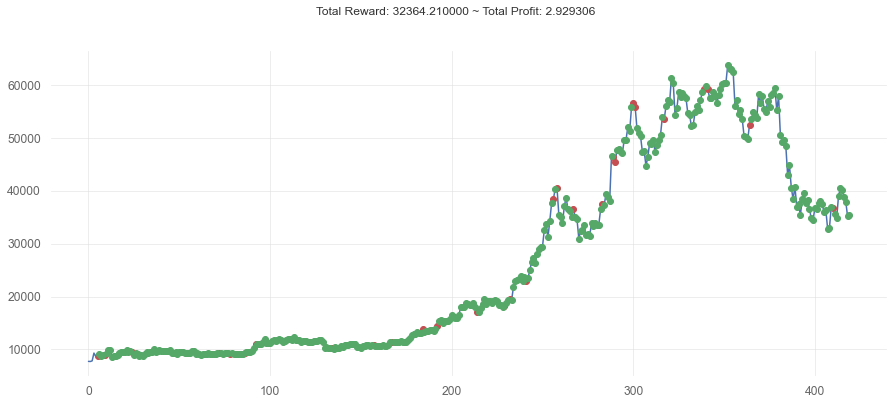

In [54]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

                           Strategy
-------------------------  ----------
Start Period               2020-05-03
End Period                 2021-06-19
Risk-Free Rate             0.0%
Time in Market             7.0%

Cumulative Return          192.93%
CAGR%                      159.13%

Sharpe                     1.3
Sortino                    3.04
Sortino/√2                 2.15

Max Drawdown               -41.78%
Longest DD Days            83
Volatility (ann.)          64.55%
Calmar                     3.81
Skew                       8.02
Kurtosis                   137.9

Expected Daily %           0.26%
Expected Monthly %         7.98%
Expected Yearly %          71.15%
Kelly Criterion            46.74%
Risk of Ruin               0.0%
Daily Value-at-Risk        -6.36%
Expected Shortfall (cVaR)  -6.36%

Gain/Pain Ratio            2.21
Gain/Pain (1M)             2.68

Payoff Ratio               1.52
Profit Factor              3.21
Common Sense Ratio         nan
CPC Index                 

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2021-04-02,2021-06-19,2021-06-19,78,-41.783623,-40.714952
2,2020-09-07,2020-09-07,2020-10-10,33,-7.522243,-1.864422
3,2020-05-05,2020-07-21,2020-07-27,83,-4.418222,-4.348567
4,2021-01-09,2021-01-09,2021-01-18,9,-0.977836,0.000000


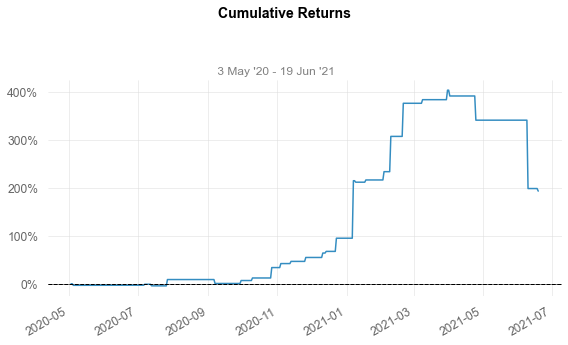

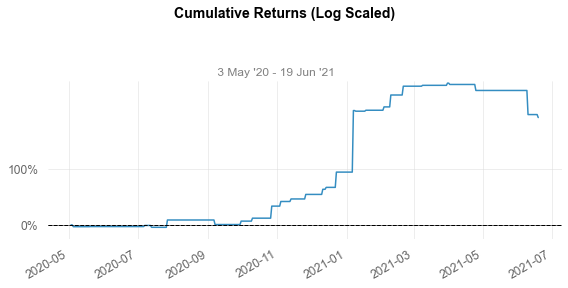

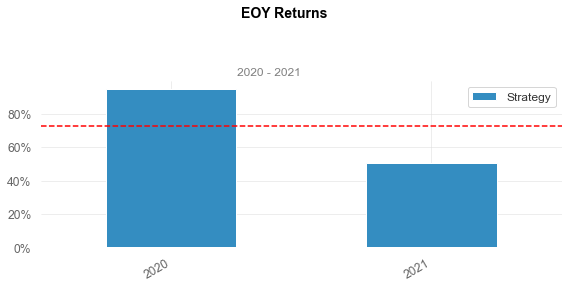

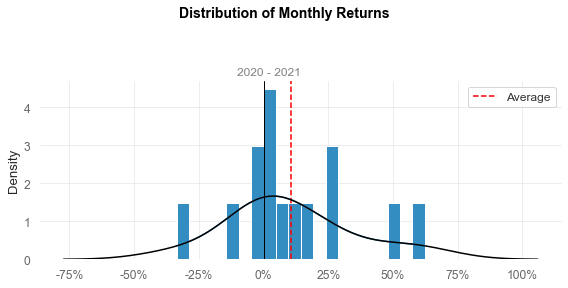

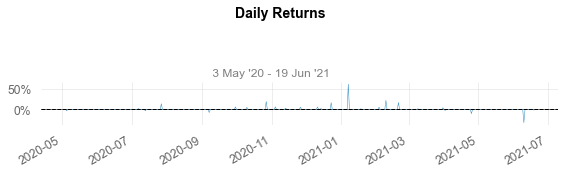

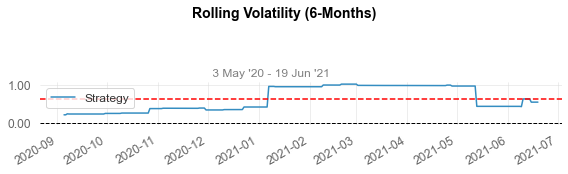

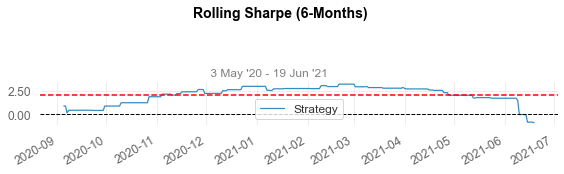

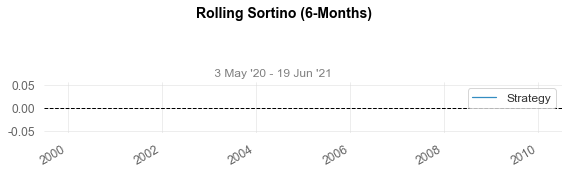

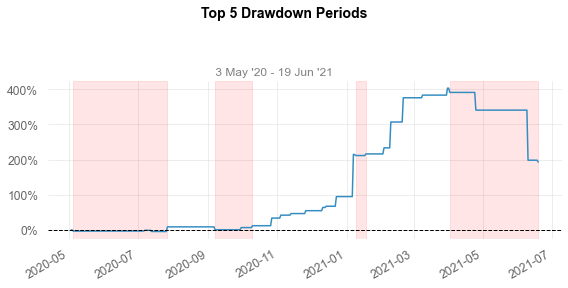

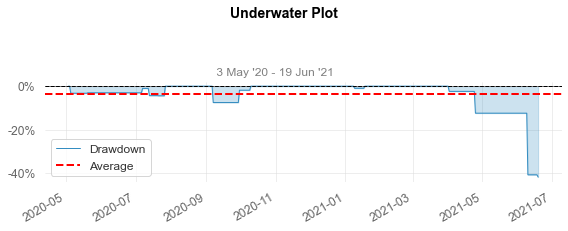

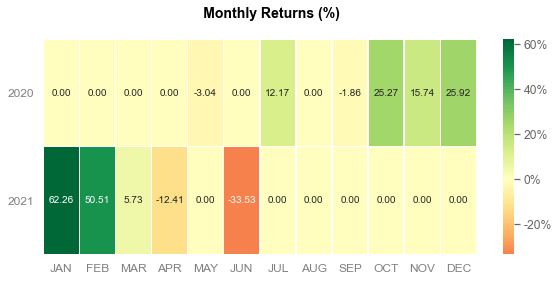

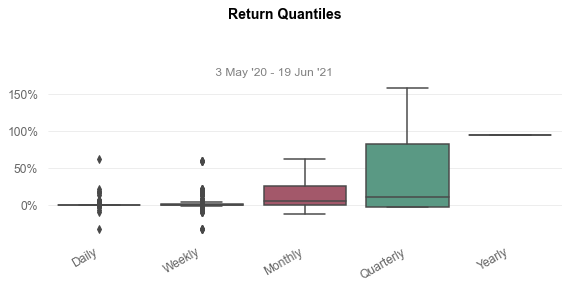

In [55]:
qs.extend_pandas()

net_worth = pd.Series(env.history['total_profit'], index=bitcoin_df.index[test_start+1:test_end])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)
# qs.reports.html(returns, output='a2c_quantstats.html')